# GAIA DR2


 _____________________
< oh my so much data! >
 ---------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----- |
                ||     ||
                


In [3]:
%%time
conditions='WHERE gs.parallax > 0'

qry = """
SELECT TOP 100000 gs.random_index,*
FROM gaiadr2.gaia_source as gs
{}
""".format(conditions)
data_all = Gaia.launch_job_async(qry).get_results().to_pandas()

Launched query: '
SELECT TOP 1000 gs.random_index,*
FROM gaiadr2.gaia_source as gs
WHERE gs.parallax > 0
'
Retrieving async. results...
Query finished.
CPU times: user 884 ms, sys: 14.1 ms, total: 898 ms
Wall time: 6.49 s


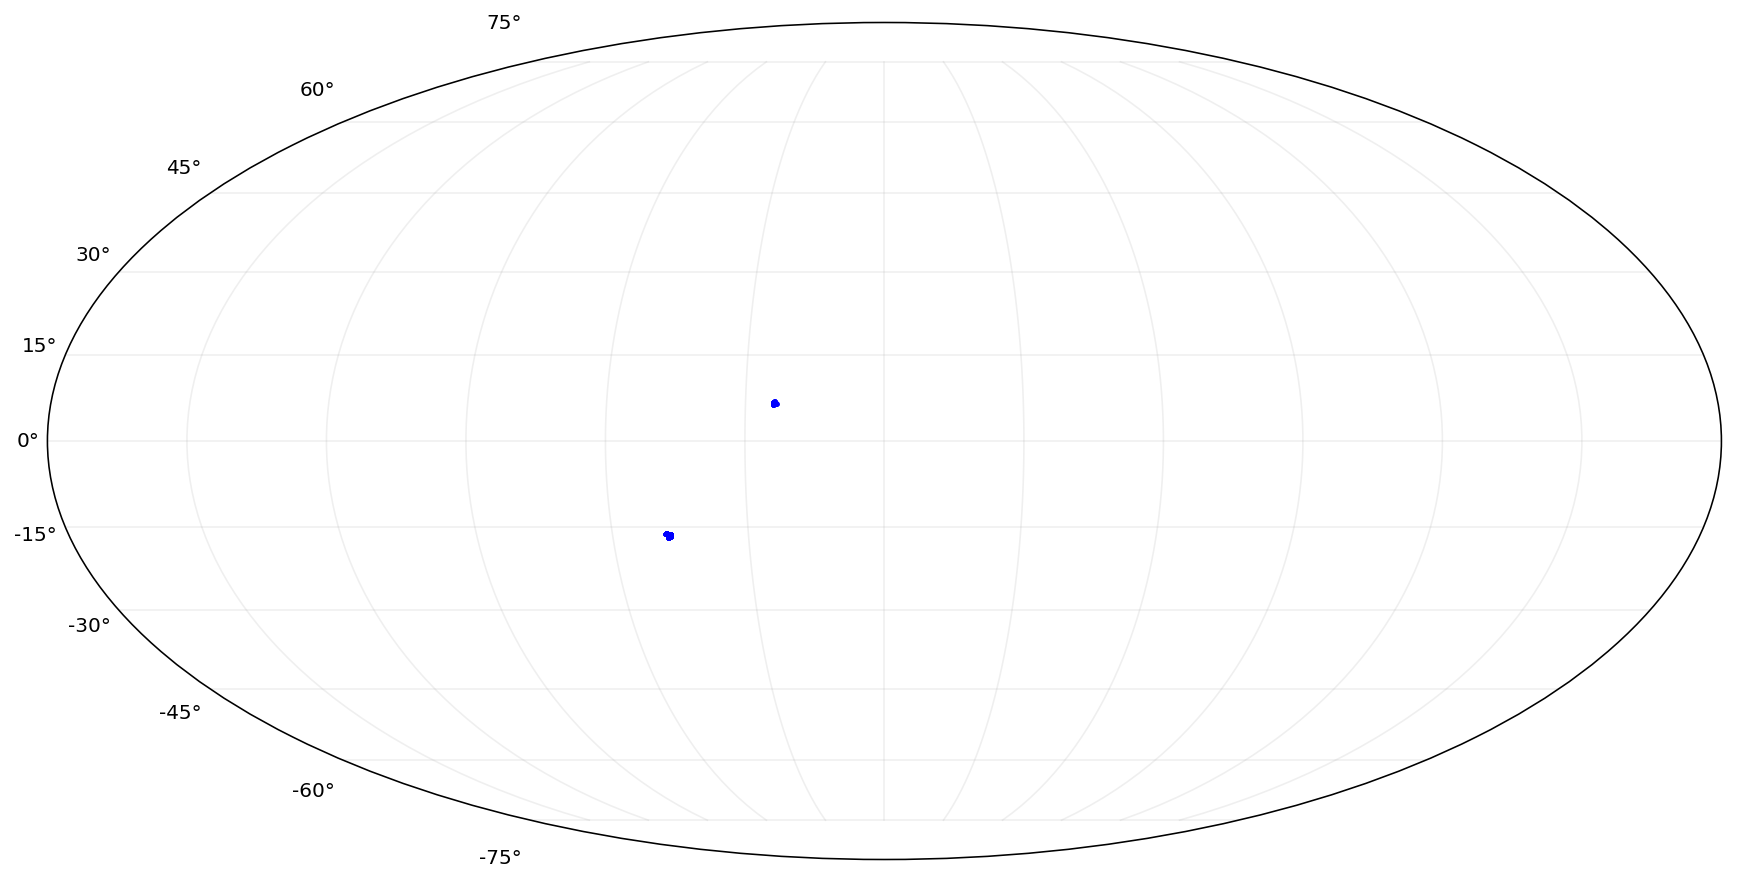

In [5]:
ra  = data_all.l.values
ra = coord.Angle(ra*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = data_all.b.values
dec = coord.Angle(dec*u.degree)
#c = data_all.radial_velocity_error

fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111,projection='mollweide')
s = ax.scatter(ra.radian,dec.radian,color='blue',s=1.)
ax.grid(alpha=0.2)
#plt.colorbar(s,ax=ax);
ax.set_xticklabels([]);

# Includes, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
Gaia.login(user='yourusername',password='yourpassword')

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


## Some other stuff you might find useful 

In [2]:
v_sun = coord.Galactocentric.galcen_v_sun.to_cartesian().get_xyz().to_value()

def rv_to_gsr(ra,dec,rv):
    icrs = coord.ICRS(ra=ra*u.deg, dec=dec*u.deg,
                  radial_velocity=rv*u.km/u.s)
    
    gal = icrs.transform_to(coord.Galactic)
    cart_data = gal.data.to_cartesian().get_xyz().to_value()
    unit_vector = cart_data / np.linalg.norm(cart_data)
    
    return rv+np.dot(v_sun,unit_vector)

In [ ]:
%%time 
data['rv_corrected'] = data[['ra','dec','radial_velocity']].apply(lambda x: rv_to_gsr(x.ra,x.dec,x.radial_velocity), axis=1)